# Handling Missing Values With Scikit_Learn

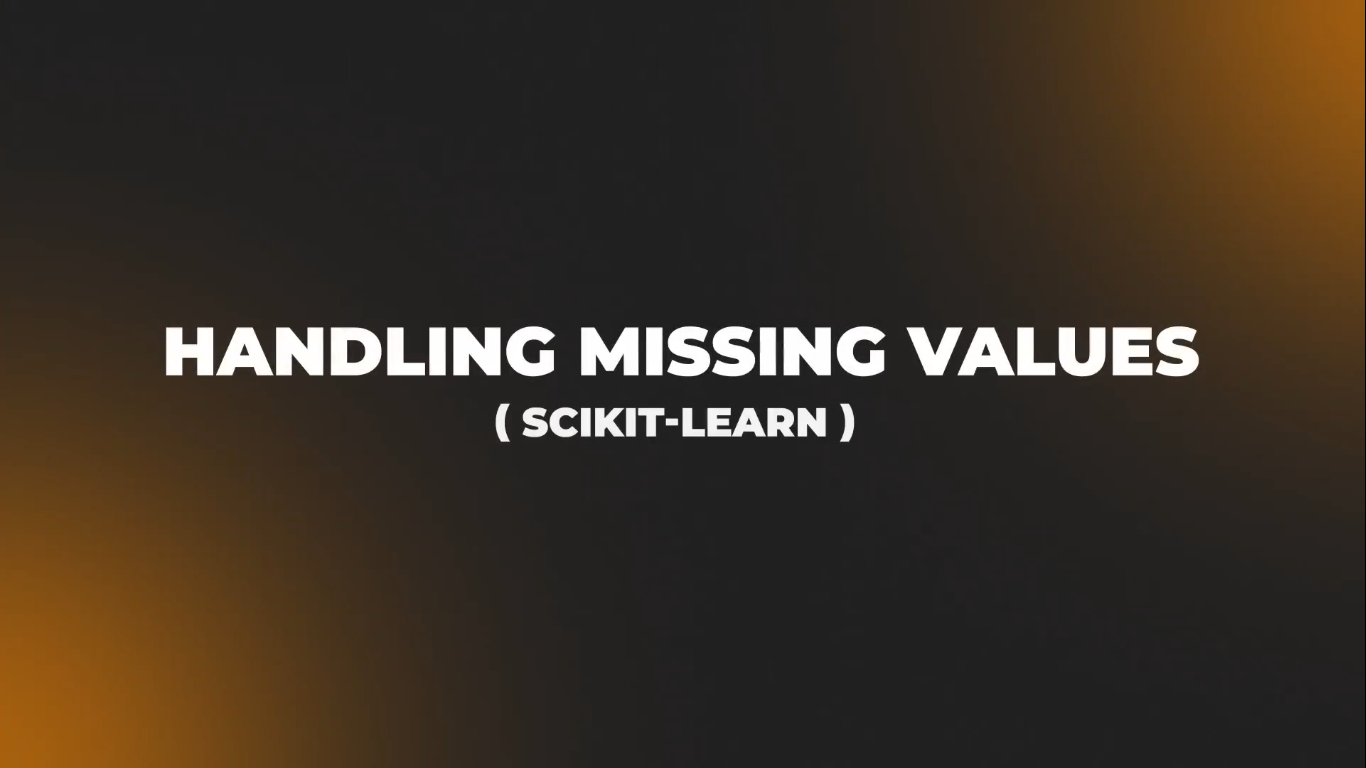

In [213]:
from IPython.display import Image, display
display (Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_05.png"))

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [76]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [78]:
def check(self):
    print("\nCheck Shape:")
    print(self.shape)
    print("\nCheck Info:")
    print(self.info())
    print("\nCheck NaN Values:")
    print(self.isnull().sum())
    

check(df)


Check Shape:
(614, 13)

Check Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Check NaN Values:
Loan_ID               0
Gender               13
Mar

In [46]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [48]:
# Select datatype
df.select_dtypes(include='float64').head(3)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0


In [15]:
df2 = df.select_dtypes(include="float64")
df2.isnull().sum()

CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [16]:
# Check NaN Values as Percentage 
df2.isnull().sum()/len(df2)*100


CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
dtype: float64

In [20]:
# Overall NaN Values as Percentage
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100

1.8667000751691305

# Machine Learning

In [23]:
from sklearn.impute import SimpleImputer

In [25]:
# Filling NaN data by using data mean
si = SimpleImputer(strategy="mean")
si

SimpleImputer()

In [84]:
# Select only Float type data
df.select_dtypes(include='float64').head(3)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0


In [86]:
# Filling NaN data and creat a array
ar = si.fit_transform(df[df.select_dtypes(include='float64').columns])
ar

array([[0.00000000e+00, 1.46412162e+02, 3.60000000e+02, 1.00000000e+00],
       [1.50800000e+03, 1.28000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 6.60000000e+01, 3.60000000e+02, 1.00000000e+00],
       ...,
       [2.40000000e+02, 2.53000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.87000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.33000000e+02, 3.60000000e+02, 0.00000000e+00]])

In [31]:
# Creating new DataFrame
df3 = pd.DataFrame(ar,columns=df.select_dtypes(include='float64').columns)
df3.head(3)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0


In [205]:
check(df3)


Check Shape:
(614, 4)

Check Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CoapplicantIncome  614 non-null    float64
 1   LoanAmount         614 non-null    float64
 2   Loan_Amount_Term   614 non-null    float64
 3   Credit_History     614 non-null    float64
dtypes: float64(4)
memory usage: 19.3 KB
None

Check NaN Values:
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


# All in One

In [82]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputer with mean strategy
si = SimpleImputer(strategy="mean")

# Select float columns
df_dt = df.select_dtypes(include='float64')

# Fill NaNs with column means
ar = si.fit_transform(df_dt)

# Create DataFrame with original column names
df = pd.DataFrame(ar, columns=df_dt.columns)

# Show DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CoapplicantIncome  614 non-null    float64
 1   LoanAmount         614 non-null    float64
 2   Loan_Amount_Term   614 non-null    float64
 3   Credit_History     614 non-null    float64
dtypes: float64(4)
memory usage: 19.3 KB
